In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [37]:
#Chargement de données
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

In [38]:
X_train.shape

(50000, 32, 32, 3)

In [39]:
X_test.shape

(10000, 32, 32, 3)

In [40]:
y_train.shape

(50000, 1)

In [41]:
y_test.shape

(10000, 1)

In [49]:
N = X_train.shape[0]
M = X_test.shape[0]

**Convert class vectors to binary class matrices using one hot encoding**

In [43]:
y_train_ohe = to_categorical(y_train, num_classes = 100)
y_test_ohe = to_categorical(y_test, num_classes = 100)

**Normalisation de données**

In [44]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255
X_test /= 255
print(X_train.shape)
print(y_train_ohe.shape)
print(X_test.shape)
print(y_test_ohe.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


In [45]:
X_val = X_train[40000:]
y_val = y_train_ohe[40000:]
print(X_val.shape)
print(y_val.shape)

(10000, 32, 32, 3)
(10000, 100)


In [46]:
X_train = X_train[:40000]
y_train_ohe = y_train_ohe[:40000]
print(X_train.shape)
print(y_train_ohe.shape)

(40000, 32, 32, 3)
(40000, 100)


**Convertion en binaire (decimal --> 10bits)**

In [47]:
num_classes = 10
y_train_cg = to_categorical(y_train, num_classes)
y_test_cg = to_categorical(y_test, num_classes)

In [50]:
X_train = np.reshape(X_train, (N,3072))
X_test = np.reshape(X_test, (M,3072))

In [51]:
X_train.shape

(40000, 3072)

In [52]:
p  = 8
modele = Sequential()
# Première couche : p neurones
modele.add(Dense(1024, input_dim= 3072, activation = "relu"))
#Deuxième couche
modele.add(Dense(512, activation = "relu"))
modele.add(Dense(256, activation = "relu"))
modele.add(Dense(128, activation = "relu"))
#Couche de sortie : 10 neurones
modele.add(Dense(10, activation = "softmax"))

In [53]:
from sklearn import metrics
#Choix de la méthode de descente de gradient
modele.compile(loss='categorical_crossentropy',
               optimizer = 'sgd',
               metrics= ['accuracy'])
print(modele.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,837,066
Trainable params: 3,837,066
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
modele.fit(X_train, y_train_cg[:40000], batch_size= 64, epochs=40)

Epoch 1/40
625/625 [==============================] - 21s 33ms/step - loss: 1.9416 - accuracy: 0.3038
Epoch 2/40
625/625 [==============================] - 20s 33ms/step - loss: 1.7544 - accuracy: 0.3740
Epoch 3/40
625/625 [==============================] - 20s 33ms/step - loss: 1.6632 - accuracy: 0.4093
Epoch 4/40
625/625 [==============================] - 21s 33ms/step - loss: 1.6048 - accuracy: 0.4299
Epoch 5/40
625/625 [==============================] - 20s 33ms/step - loss: 1.5563 - accuracy: 0.4460
Epoch 6/40
625/625 [==============================] - 21s 33ms/step - loss: 1.5152 - accuracy: 0.4592
Epoch 7/40
625/625 [==============================] - 22s 35ms/step - loss: 1.4815 - accuracy: 0.4714
Epoch 8/40
625/625 [==============================] - 21s 33ms/step - loss: 1.4470 - accuracy: 0.4838
Epoch 9/40
625/625 [==============================] - 20s 33ms/step - loss: 1.4158 - accuracy: 0.4963
Epoch 10/40
625/625 [==============================] - 20s 33ms/step - loss: 1.389

In [55]:
res = modele.evaluate(X_test, y_test_cg, verbose=0)
print("Valeur de l'erreur sur les données de test (loss): ", res[0])
print("Accuracy: ", res[1])

Valeur de l'erreur sur les données de test (loss):  1.4912079572677612
Accuracy:  0.5202999711036682


**Prediction sur les données de test**

In [56]:
Y_predict = modele.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [57]:
Y_predict

array([[3.3392499e-03, 1.0775309e-03, 1.6804144e-01, ..., 2.1621268e-04,
        3.3769608e-03, 9.3208067e-04],
       [6.1549763e-03, 6.2836431e-02, 1.0108436e-04, ..., 3.3753640e-06,
        9.2714775e-01, 3.5492207e-03],
       [5.5340505e-01, 6.2166937e-02, 1.5225904e-03, ..., 2.2473841e-03,
        3.7163636e-01, 4.0863240e-03],
       ...,
       [1.0504969e-03, 6.2355703e-06, 3.3723453e-01, ..., 5.6277093e-04,
        1.0901931e-02, 9.7828312e-04],
       [4.9003079e-03, 2.8086662e-05, 6.9032830e-01, ..., 2.0332956e-03,
        1.9560651e-04, 1.5715019e-05],
       [9.9514611e-03, 1.0863375e-04, 1.8463095e-01, ..., 1.1741367e-01,
        1.5659927e-03, 1.9803997e-03]], dtype=float32)

Text(0.5, 1.0, 'valeur prédite airplane')

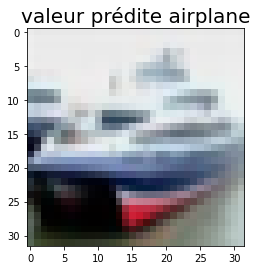

In [58]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'home']
i = 1
img_predit = X_test[i]
plt.imshow(X_test[i].reshape(32, 32, -1), cmap = 'CMRmap_r')
plt.title("valeur prédite " + str(class_names[np.argmax(img_predit[i], axis = 0)]), size=20)

**Formulation Mathematique du problème**

-**Modèle** est de la forme ***y = f(x) ou (y(1),...,y(n)) = f(x(1),...,x(n))*** tout simplement car un neurone artificiel est une fonction qui prend un ou des x à l'entrée, le calcul en le multipliant par son poids pour ensuite les transférés aux autres neurones. **y = f(w(1)x(1).....w(n)x(n))**.

-**paramètre**: le type de couche, le nombre de neurone dans chaque couche, fonction d'activation de chaque couche, la valeur des entrées et et sorties hyperparamètre le nombre de couche dans le modèle crictère et approche d'optimisation: La fonction de perte *loss='categorical_crossentropy'* est utilisée pour diminuer l'erreur. Plus l'erreur est faible plus le modèle est précis L'approche d'optimisation est la methode de descente de grandient